We have got vast amount of feedback from the users. To go through all the feedback can be a tedious job. 
We have to categorize opinions expressed in feedback forums. This can be utilized for feedback management system.
We Classification of individual comments/reviews.and we also determining overall rating based on individual comments/reviews.
So that company can get a complete idea on feedbacks provided by customers and can take care on those particular fields.
This makes more loyal Customers to the company, increase in business,fame,brand value,profits.

IMPORTING ALL THE LIBRARIES REQUIRED

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense,LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
df = pd.read_csv("Musical_instruments_reviews.csv")

In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


CHECKING FOR NULL VALUES

In [5]:
df.isna().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

FILLING ALL NULL VALUES USING FILLNA

In [6]:
df.reviewText.fillna("",inplace = True)

DELETING THE COLUMNS WHICH ARE NOT REQUIRED

In [7]:
del df['reviewerID']
del df['asin']
del df['reviewerName']
del df['helpful'] 
del df['unixReviewTime']
del df['reviewTime']

In [8]:
df.head()

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake
2,The primary job of this device is to block the...,5.0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.


In [9]:
df['text'] = df['reviewText'] + ' ' + df['summary']
del df['reviewText']
del df['summary']

In [10]:
df.head()

,overall,text
0,5.0,"Not much to write about here, but it does exac..."
1,5.0,The product does exactly as it should and is q...
2,5.0,The primary job of this device is to block the...
3,5.0,Nice windscreen protects my MXL mic and preven...
4,5.0,This pop filter is great. It looks and perform...


GETTING THE OVERALL COUNTS

In [11]:
df.overall.value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

BASED ON RATING MAKING THE GROUP, LIKE FOR RATING 1,2,3 IN GROUP 0 AND FOR RATING 4,5 IN GROUP 1

In [12]:
def sentiment_rating(rating):
    # Replacing ratings of 1,2,3 with 0 (not good) and 4,5 with 1 (good)
    if(int(rating) == 1 or int(rating) == 2 or int(rating) == 3):
        return 0
    else: 
        return 1
df.overall = df.overall.apply(sentiment_rating) 

OVERALL COUNT AFTER GROUPING IN 0 AND 1

In [13]:
df.overall.value_counts()

1    9022
0    1239
Name: overall, dtype: int64

REMOVING STOPWORDS WITH THE HELP OF NLTK CORPUS

In [14]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

CHECKING FOR ADJECTIVE,VERB,NOUN IN COMMENTS 

In [15]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

APPLYING LEMITIZER TO GET THE ROOT FORM OF INFLECTED WORDS WITH THE HELP OF NLTK

In [16]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [17]:
df.text = df.text.apply(lemmatize_words)

SPLITING DATA INTO TRAIN AND TEST

In [18]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.overall,test_size = 0.2 , random_state = 0)

CLASSIFYING TRAINED DATA INTO  GOOD AND BAD

In [19]:
good = x_train[y_train[y_train == 1].index]
bad = x_train[y_train[y_train == 0].index]
x_train.shape,good.shape,bad.shape

((8208,), (7197,), (1011,))

MAKING WORDCLOUD FOR DATA CLASSIFIED AS BAD

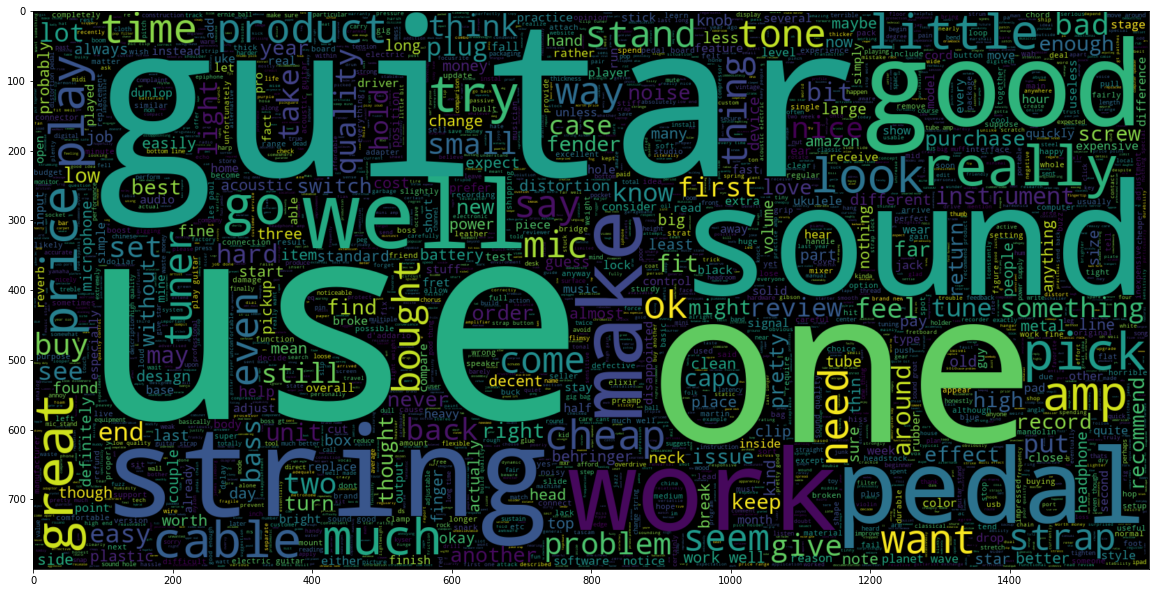

In [20]:
plt.figure(figsize = (20,20)) # Text Reviews with Poor Ratings
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(bad))
plt.imshow(wc,interpolation = 'bilinear')

MAKING WORDCLOUD FOR DATA CLASSIFIED AS GOOD

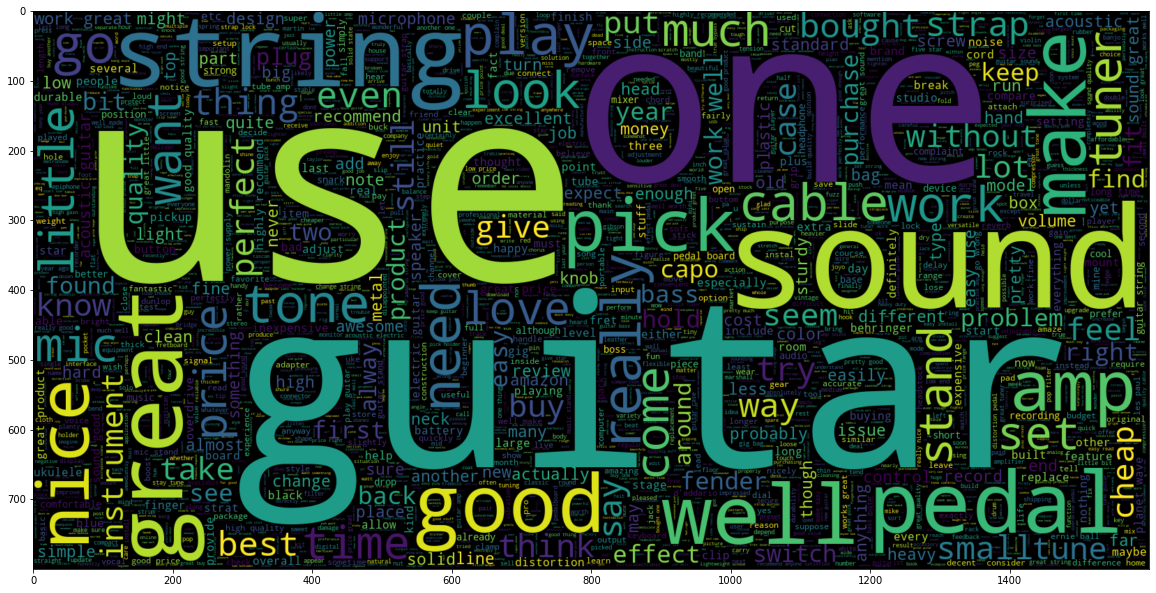

In [21]:
plt.figure(figsize = (20,20)) # # Text Reviews with Good Ratings
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(good))
plt.imshow(wc,interpolation = 'bilinear')

COUNT VECTORIZER ON TRAIN AND TEST DATA WHICH CONVERTS COLLECTION OF TEXT DOCUMENTS TO A MATRIX OF TOKEN COUNT

In [22]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (8208, 573616)
BOW_cv_test: (2053, 573616)


TFID VECTORIZER ON TRAIN AND TEST DATA WHICH CONVERTS COLLECTION OF TEXT DOCUMENTS TO A MATRIX OF TF-IDF FEATURES

In [23]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(x_train)
#transformed test reviews
tv_test_reviews=tv.transform(x_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (8208, 573616)
Tfidf_test: (2053, 573616)


LOGISTIC REGRESSION MODEL ON VECTORIZED DATA

In [24]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=0)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,y_train)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,y_train)
print(lr_tfidf)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [25]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)

In [26]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.8904042864101315
lr_tfidf_score : 0.8889430102289333


In [27]:
#Classification report for bag of words
lr_bow_report=classification_report(y_test,lr_bow_predict,target_names=['0','1'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(y_test,lr_tfidf_predict,target_names=['0','1'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

           0       1.00      0.01      0.03       228
           1       0.89      1.00      0.94      1825

    accuracy                           0.89      2053
   macro avg       0.95      0.51      0.48      2053
weighted avg       0.90      0.89      0.84      2053

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.89      1.00      0.94      1825

    accuracy                           0.89      2053
   macro avg       0.44      0.50      0.47      2053
weighted avg       0.79      0.89      0.84      2053



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
#training the model
mnb=MultinomialNB()
#fitting the nb for bag of words
mnb_bow=mnb.fit(cv_train_reviews,y_train)
print(mnb_bow)
#fitting the nb for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,y_train)
print(mnb_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [29]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)

In [30]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(y_test,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.8899171943497322
mnb_tfidf_score : 0.8889430102289333


CLASIFICATION REPORT FOR BOW AND TF-IDF 

In [31]:
mnb_bow_report = classification_report(y_test,mnb_bow_predict,target_names = ['0','1'])
print(mnb_bow_report)
mnb_tfidf_report = classification_report(y_test,mnb_tfidf_predict,target_names = ['0','1'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

           0       0.67      0.02      0.03       228
           1       0.89      1.00      0.94      1825

    accuracy                           0.89      2053
   macro avg       0.78      0.51      0.49      2053
weighted avg       0.87      0.89      0.84      2053

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.89      1.00      0.94      1825

    accuracy                           0.89      2053
   macro avg       0.44      0.50      0.47      2053
weighted avg       0.79      0.89      0.84      2053



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


USING SEQUENTIAL MODEL OF KERAS FOR DEEP LEARNING

In [32]:
model = Sequential()
model.add(Dense(units = 75 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu')) 
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [33]:
model.summary()             #prints a summary representation of your model.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 75)                43021275  
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3800      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 43,026,621
Trainable params: 43,026,621
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(cv_train_reviews,y_train , epochs = 10)

Epoch 1/10
8208/8208 [==============================] - 37s 5ms/step - loss: 0.4125 - accuracy: 0.8746
Epoch 2/10
8208/8208 [==============================] - 37s 5ms/step - loss: 0.0268 - accuracy: 0.9849
Epoch 3/10
8208/8208 [==============================] - 37s 5ms/step - loss: 1.1033e-04 - accuracy: 1.0000
Epoch 4/10
8208/8208 [==============================] - 37s 5ms/step - loss: 6.8976e-05 - accuracy: 1.0000
Epoch 5/10
8208/8208 [==============================] - 37s 5ms/step - loss: 5.2169e-05 - accuracy: 1.0000
Epoch 6/10
8208/8208 [==============================] - 37s 4ms/step - loss: 4.0401e-05 - accuracy: 1.0000
Epoch 7/10
8208/8208 [==============================] - 37s 5ms/step - loss: 3.1832e-05 - accuracy: 1.0000
Epoch 8/10
8208/8208 [==============================] - 37s 5ms/step - loss: 2.5378e-05 - accuracy: 1.0000
Epoch 9/10
8208/8208 [==============================] - 37s 4ms/step - loss: 2.0558e-05 - accuracy: 1.0000
Epoch 10/10
8208/8208 [======================

In [35]:
model.evaluate(cv_test_reviews,y_test)[1]

2053/2053 [==============================] - 8s 4ms/step


0.8908913731575012

# CONCLUSION:BY EVALUATING THE MODEL WE GETTING 89% ACCURACY